#### evaluate the prediction performance of the trained model

#### small model

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix
 [[ 93  38]
 [ 59 102]]
accuracy:0.6678082191780822
precision:0.7285714285714285
recall:0.6335403726708074
f1-score:0.6777408637873754


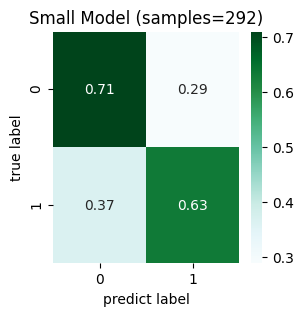

In [2]:
# load datasets
y_true = np.load('../../model/pred_results_skin/small_label.npy')
y_pred = np.load('../../model/pred_results_skin/small_predict.npy')

samples = y_true.shape[0]

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
sns.heatmap(new_obj, fmt='.2f', cmap='BuGn', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.title('Small Model (samples=' + str(samples) + ')')
plt.savefig('images/cm-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.7091797241508726


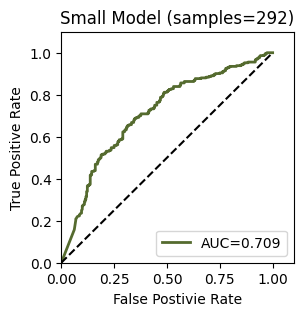

In [3]:
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
fpr_xgb_1, tpr_xgb_1, thresholds_1 = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_xgb_1 = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)
ax = plt.subplots(figsize=(3,3))
plt.title('Small Model (samples=' + str(samples) + ')')
plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb,color='#556B2F')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/auc-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

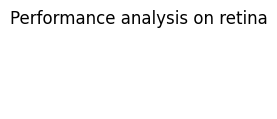

In [4]:
ax = plt.subplots(figsize=(1,1))
plt.axis('off')
plt.title('Performance analysis on retina')
plt.savefig('images/head.png',dpi=300, bbox_inches = 'tight')
plt.show()